In [4]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration, Blip2Processor, Blip2ForConditionalGeneration, AutoProcessor, AutoModelForCausalLM
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch


/home/user/new1/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-08-01 16:31:06.233421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-01 16:31:06.248202: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-01 16:31:06.266490: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-01 16:31:06.271703: E

In [5]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
processor1 = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model1 =  BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

processor2 = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model2 =  BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

processor3 = BlipProcessor.from_pretrained("noamrot/FuseCap")
model3 =  BlipForConditionalGeneration.from_pretrained("noamrot/FuseCap")

processor4 = Blip2Processor.from_pretrained("Salesforce/blip2-opt-2.7b")
model4 = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b")

processor5 = BlipProcessor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model5 = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-flan-t5-xl")

processor6 = AutoProcessor.from_pretrained("microsoft/git-base-coco")
model6 = AutoModelForCausalLM.from_pretrained("microsoft/git-base-coco")

processor7 = AutoProcessor.from_pretrained("microsoft/git-large-coco")
model7 = AutoModelForCausalLM.from_pretrained("microsoft/git-large-coco")

processor8 = AutoProcessor.from_pretrained("microsoft/git-large")
model8 = AutoModelForCausalLM.from_pretrained("microsoft/git-large")

processor9 = AutoProcessor.from_pretrained("microsoft/git-base")
model9 = AutoModelForCausalLM.from_pretrained("microsoft/git-base")

Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'BertTokenizerFast'.
Loading checkpoint shards: 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]


In [23]:
img_url = "test1.jpg"
image = Image.open(img_url)
img = image.convert('RGB')

inputs = processor1(img, return_tensors="pt")
out = model1.generate(**inputs, num_beams = 5)
generated_text1 = processor1.decode(out[0], skip_special_tokens = True)

inputs = processor2(img, return_tensors="pt")
out = model2.generate(**inputs, num_beams = 5)
generated_text2 = processor2.decode(out[0], skip_special_tokens = True)

inputs = processor3(img, return_tensors="pt")
out = model3.generate(**inputs, num_beams = 10, max_length = 200)
generated_text3 = processor3.decode(out[0], skip_special_tokens = True)
# generated_text3 = processor3.batch_decode(out, skip_special_tokens=True)[0].strip()

inputs = processor4(img, return_tensors="pt")
out = model4.generate(**inputs, num_beams = 5)
generated_text4 = processor4.decode(out[0], skip_special_tokens = True)

inputs = processor5(img, return_tensors="pt")
out = model5.generate(**inputs, num_beams = 5)
generated_text5 = processor5.decode(out[0], skip_special_tokens = True)

pixel_values = processor6(images=image, return_tensors="pt").pixel_values
generated_ids = model6.generate(pixel_values=pixel_values, max_length=50)
generated_text6 = processor6.batch_decode(generated_ids, skip_special_tokens=True)[0]

pixel_values = processor7(images=image, return_tensors="pt").pixel_values
generated_ids = model7.generate(pixel_values=pixel_values, max_length=50)
generated_text7 = processor7.batch_decode(generated_ids, skip_special_tokens=True)[0]

pixel_values = processor8(images=image, return_tensors="pt").pixel_values
generated_ids = model8.generate(pixel_values=pixel_values, max_length=50)
generated_text8 = processor8.batch_decode(generated_ids, skip_special_tokens=True)[0]

pixel_values = processor9(images=image, return_tensors="pt").pixel_values
generated_ids = model9.generate(pixel_values=pixel_values, max_length=50)
generated_text9 = processor9.batch_decode(generated_ids, skip_special_tokens=True)[0]


# generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()


In [24]:
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

#function to generate the description
def predict_step(image_paths):
  images = []

  # convert all images in to the RGB and save in list
  for image_path in image_paths:
    i_image = Image.open(image_path)
    if i_image.mode != "RGB":
      i_image = i_image.convert(mode="RGB")

    images.append(i_image)

  pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values

  output_ids = model.generate(pixel_values, **gen_kwargs)

  preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
  preds = [pred.strip() for pred in preds]
  return preds[0]

generated_text10 = predict_step([img_url])


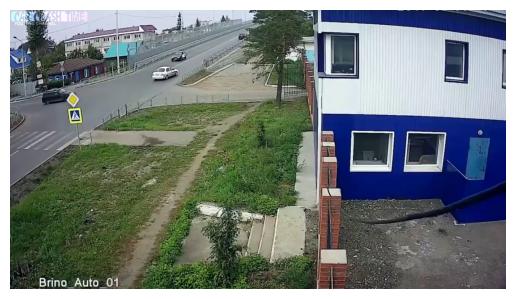


1. blip-base 
a large blue building sitting on the side of a road

2. blip-large 
this is an image of a view of a street from a window of a building

3. fuse-cap 
aerial view of a blue and white building with white windows and a yellow sign, surrounded by green grass and a small tree a white car and a black car are parked in front of the building

4. blip2-opt 
a blue and white building with a car parked in front of it


5. blip2-flan 
two pictures of a building and a street

6. git-base-coco 
a blue and white house sitting on top of a grass covered field.

7. git-large-coco 
the road is empty and the car is driving on the road.

8. git-large 
the man is driving his car to the building

9. git-base 
a blue and white house

10. vit-gpt2 
a street scene with cars parked on the side of the road



In [25]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()

print("\n1. blip-base \n" + generated_text1 + "\n")
print("2. blip-large \n" + generated_text2 + "\n")
print("3. fuse-cap \n" + generated_text3 + "\n")
print("4. blip2-opt \n" + generated_text4 + "\n")
print("5. blip2-flan \n" + generated_text5 + "\n")
print("6. git-base-coco \n" + generated_text6 + "\n")
print("7. git-large-coco \n" + generated_text7 + "\n")
print("8. git-large \n" + generated_text8 + "\n")
print("9. git-base \n" + generated_text9 + "\n")
print("10. vit-gpt2 \n" + generated_text10 + "\n")


In [29]:
# Conditional Image captioning
text = "caption this image "
inputs = processor1(img, text, return_tensors="pt")
out = model1.generate(**inputs)
print(processor1.decode(out[0], skip_special_tokens=True))

/home/user/new1/.venv/lib/python3.12/site-packages/transformers/generation/utils.py:1259: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


caption this image of a man riding a horse on the beach


In [ ]:
# 1. (week 1) Done--- Collect the different prebuild model and test on their corresponding input images
# 2. (week 2) Done --- try all the models on CCTV low resolution images and amalyze the final model for fine tuning with our data (current preference is BLIP and Fusecap)

# 3. (week 3) Working --- learn the finetune of the model

# 4. (week 4) Future --- Collect the Dataset with respect to the requirements for finetunning
# 5. (week 5) Future --- fine tune the our select model with the collected final CCTV images

# 6. (week 6) Future --- Work on relevance of output with the input and try to cover all the objects in the image with proper description

# pending work
# DONE almost - make tokens from the output text
# DONE almost - get text from the cctv images with the time date and place and all...
# make a web api


# extra for better performance

# fine tune with our data 
# try incode prompt like......one shot prompt or multi shot prompt like something......in code already with all the queries